In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
np.NaN = np.nan
import pandas_ta as ta
from data_pipeline.stage_01.historical_data import supertrend

In [2]:
df = pd.read_csv('/home/sacsresta/Documents/RESEARCH/Project/sentiment_categorical/merged_data_AAPL_from_2015-01-01_to_2025-03-01.csv')

In [3]:
df.drop(columns=['Ticker','headline'], inplace = True)

In [5]:
df = supertrend(df)

In [31]:
df['shifted_direction'] = df.Direction.shift(-1)
df.dropna(subset=['shifted_direction'],inplace = True)
df['shifted_direction'] =df['shifted_direction'].astype(int)

In [32]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'sentiment_score', 'sentiment_class', 'Supertrend', 'Direction',
       'UpperBand', 'LowerBand', 'Uptrend', 'Downtrend', 'shifted_direction'],
      dtype='object')

In [93]:
data = df[['Date', 'Close', 'High', 'Low', 'Open', 'Volume',
       'sentiment_score', 'Supertrend','Direction','shifted_direction','Uptrend', 'Downtrend',]]

# Lets backtest before building model to check

In [40]:
def get_direction_values():
    return data.Direction.values


In [41]:
get_direction_values()

array([0, 1, 1, ..., 1, 1, 1])

In [94]:
data

,Date,Close,High,Low,Open,Volume,sentiment_score,Supertrend,Direction,shifted_direction,Uptrend,Downtrend
0,2015-01-02,27.332500,27.860001,26.837500,27.847500,212818400,-0.357845,0.000000,0,1,NaN,NaN
1,2015-01-05,26.562500,27.162500,26.352501,27.072500,257142000,-0.017792,0.000000,1,1,0.000000,NaN
2,2015-01-06,26.565001,26.857500,26.157499,26.635000,263188400,0.773892,0.000000,1,1,0.000000,NaN
3,2015-01-07,26.937500,27.049999,26.674999,26.799999,160423600,0.227357,0.000000,1,1,0.000000,NaN
4,2015-01-08,27.972500,28.037500,27.174999,27.307501,237458000,0.402678,0.000000,1,1,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2531,2025-02-20,245.830002,246.779999,244.289993,244.940002,32316900,-0.400959,231.323993,1,1,231.323993,NaN
2532,2025-02-21,245.550003,248.690002,245.220001,245.949997,53197400,0.060861,232.714001,1,1,232.714001,NaN
2533,2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400,-0.528224,233.089000,1,1,233.089000,NaN
2534,2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300,-0.234334,233.394003,1,1,233.394003,NaN


In [43]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

def get_direction():
  return df.Direction.values

def get_downtrend():
  return df.Downtrend.values

def get_uptrend():
  return df.Uptrend.values

class CustomStrategy(Strategy):
    def init(self):
        super().init()
        self.signal = self.I(get_direction)
        self.uptrend = self.I(get_uptrend, overlay=True, name="Uptrend", color="green")
        self.downtrend = self.I(get_downtrend, overlay=True, name="Downtrend", color="red")

    def next(self):
      if self.signal == 1:
        if not self.position:
          self.buy()
      elif self.signal == -1:
        if self.position:
          self.position.close()



bt = Backtest(df, CustomStrategy, cash=100000, commission=.001)
stats = bt.run()
stats

/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/backtesting/backtesting.py:1201: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  (data.index.is_numeric() and
/tmp/ipykernel_42373/4124758977.py:31: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(df, CustomStrategy, cash=100000, commission=.001)


Backtest.run:   0%|          | 0/2490 [00:00<?, ?it/s]

Start                                     0.0
End                                    2535.0
Duration                               2535.0
Exposure Time [%]                    58.24132
Equity Final [$]                 484153.63405
Equity Peak [$]                  550722.84617
Commissions [$]                   20986.23843
Return [%]                          384.15363
Buy & Hold Return [%]               672.17893
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Alpha [%]                           126.58974
Beta                                  0.38318
Max. Drawdown [%]                   -20.72275
Avg. Drawdown [%]                    -3.31691
Max. Drawdown Duration                  444.0
Avg. Drawdown Duration               28.55422
# Trades                                 39.0
Win Rate [%]                      

In [44]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

def get_direction():
  return data.shifted_direction.values

def get_downtrend():
  return data.Downtrend.values

def get_uptrend():
  return data.Uptrend.values

class CustomStrategy(Strategy):
    def init(self):
        super().init()
        self.signal = self.I(get_direction)
        self.uptrend = self.I(get_uptrend, overlay=True, name="Uptrend", color="green")
        self.downtrend = self.I(get_downtrend, overlay=True, name="Downtrend", color="red")

    def next(self):
      if self.signal == 1:
        if not self.position:
          self.buy()
      elif self.signal == -1:
        if self.position:
          self.position.close()



bt = Backtest(data, CustomStrategy, cash=100000, commission=.001)
stats = bt.run()
stats

/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/backtesting/backtesting.py:1201: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  (data.index.is_numeric() and
/tmp/ipykernel_42373/428808412.py:31: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(data, CustomStrategy, cash=100000, commission=.001)


Backtest.run:   0%|          | 0/2490 [00:00<?, ?it/s]

Start                                     0.0
End                                    2535.0
Duration                               2535.0
Exposure Time [%]                    58.24132
Equity Final [$]                1367828.73611
Equity Peak [$]                 1455802.77172
Commissions [$]                   43651.38521
Return [%]                         1267.82874
Buy & Hold Return [%]               672.17893
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Alpha [%]                          1022.35114
Beta                                   0.3652
Max. Drawdown [%]                   -13.09682
Avg. Drawdown [%]                    -2.65868
Max. Drawdown Duration                  218.0
Avg. Drawdown Duration               18.24409
# Trades                                 39.0
Win Rate [%]                      

In [95]:
data

,Date,Close,High,Low,Open,Volume,sentiment_score,Supertrend,Direction,shifted_direction,Uptrend,Downtrend
0,2015-01-02,27.332500,27.860001,26.837500,27.847500,212818400,-0.357845,0.000000,0,1,NaN,NaN
1,2015-01-05,26.562500,27.162500,26.352501,27.072500,257142000,-0.017792,0.000000,1,1,0.000000,NaN
2,2015-01-06,26.565001,26.857500,26.157499,26.635000,263188400,0.773892,0.000000,1,1,0.000000,NaN
3,2015-01-07,26.937500,27.049999,26.674999,26.799999,160423600,0.227357,0.000000,1,1,0.000000,NaN
4,2015-01-08,27.972500,28.037500,27.174999,27.307501,237458000,0.402678,0.000000,1,1,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2531,2025-02-20,245.830002,246.779999,244.289993,244.940002,32316900,-0.400959,231.323993,1,1,231.323993,NaN
2532,2025-02-21,245.550003,248.690002,245.220001,245.949997,53197400,0.060861,232.714001,1,1,232.714001,NaN
2533,2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400,-0.528224,233.089000,1,1,233.089000,NaN
2534,2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300,-0.234334,233.394003,1,1,233.394003,NaN


# Lets Build a model

In [48]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.8 MB/s eta 0:00:00 MB/s eta 0:00:01


In [148]:
data = df[['Date', 'Close', 'High', 'Low', 'Open', 'Volume',
       'sentiment_score', 'Supertrend','Direction','shifted_direction','Uptrend', 'Downtrend',]]


data.set_index('Date',inplace=True)
data = data[['Close','High','Low','Open','Volume','Supertrend','shifted_direction','Direction']].iloc[-1292:-38]

In [154]:
df

,Date,Adj Close,Close,High,Low,Open,Volume,sentiment_score,sentiment_class,Supertrend,Direction,UpperBand,LowerBand,Uptrend,Downtrend,shifted_direction
0,2015-01-02,24.320433,27.332500,27.860001,26.837500,27.847500,212818400,-0.357845,positive,0.000000,0,NaN,NaN,NaN,NaN,1
1,2015-01-05,23.635286,26.562500,27.162500,26.352501,27.072500,257142000,-0.017792,negative,0.000000,1,NaN,NaN,0.000000,NaN,1
2,2015-01-06,23.637514,26.565001,26.857500,26.157499,26.635000,263188400,0.773892,neutral,0.000000,1,NaN,NaN,0.000000,NaN,1
3,2015-01-07,23.968966,26.937500,27.049999,26.674999,26.799999,160423600,0.227357,negative,0.000000,1,NaN,NaN,0.000000,NaN,1
4,2015-01-08,24.889906,27.972500,28.037500,27.174999,27.307501,237458000,0.402678,neutral,0.000000,1,NaN,NaN,0.000000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,2025-02-20,245.830002,245.830002,246.779999,244.289993,244.940002,32316900,-0.400959,positive,231.323993,1,259.408000,231.323993,231.323993,NaN,1
2532,2025-02-21,245.550003,245.550003,248.690002,245.220001,245.949997,53197400,0.060861,neutral,232.714001,1,259.408000,232.714001,232.714001,NaN,1
2533,2025-02-24,247.100006,247.100006,248.860001,244.419998,244.929993,51326400,-0.528224,positive,233.089000,1,259.408000,233.089000,233.089000,NaN,1
2534,2025-02-25,247.039993,247.039993,250.000000,244.910004,248.000000,48013300,-0.234334,negative,233.394003,1,259.408000,233.394003,233.394003,NaN,1


In [155]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 2 rows (price chart and volume)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                   vertical_spacing=0.02, row_heights=[0.8, 0.2])

# Add candlestick chart for price data
fig.add_trace(
    go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='OHLC'
    ),
    row=1, col=1
)

# Add Supertrend uptrend line (green)
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Uptrend'],
        mode='lines',
        line=dict(color='green', width=2),
        name='Supertrend (Uptrend)'
    ),
    row=1, col=1
)

# Add Supertrend downtrend line (red)
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Downtrend'],
        mode='lines',
        line=dict(color='red', width=2),
        name='Supertrend (Downtrend)'
    ),
    row=1, col=1
)

# Add volume bars
fig.add_trace(
    go.Bar(
        x=df.index,
        y=df['Volume'],
        name='Volume',
        marker_color='rgba(0, 0, 255, 0.3)'
    ),
    row=2, col=1
)

# Add buy/sell signals
# Find where Direction changes from 1 to -1 (buy signal)
buy_signals = df[(df['Direction'].shift(1) == -1) & (df['Direction'] == 1)]
# Find where Direction changes from -1 to 1 (sell signal)
sell_signals = df[(df['Direction'].shift(1) == 1) & (df['Direction'] == -1)]

# Add buy signals
fig.add_trace(
    go.Scatter(
        x=buy_signals.index,
        y=buy_signals['Low'] * 0.99,  # Place slightly below the low price
        mode='markers',
        marker=dict(
            symbol='triangle-up',
            size=12,
            color='green',
            line=dict(width=1, color='darkgreen')
        ),
        name='Buy Signal'
    ),
    row=1, col=1
)

# Add sell signals
fig.add_trace(
    go.Scatter(
        x=sell_signals.index,
        y=sell_signals['High'] * 1.01,  # Place slightly above the high price
        mode='markers',
        marker=dict(
            symbol='triangle-down',
            size=12,
            color='red',
            line=dict(width=1, color='darkred')
        ),
        name='Sell Signal'
    ),
    row=1, col=1
)

# Update layout
fig.update_layout(
    title='Stock Price with Supertrend Indicator',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    height=800,
    width=1200,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=12, color='black')
)

fig.update_yaxes(title_text="Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)

# Make the grid lines light gray
fig.update_xaxes(gridcolor='lightgrey', showgrid=True)
fig.update_yaxes(gridcolor='lightgrey', showgrid=True)

# Add a range selector
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Show the figure
fig.show()

# Model Building

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler


In [152]:
X = data.drop(columns = ['shifted_direction','Direction','Supertrend'])
y = data['Direction']


tscv = TimeSeriesSplit(n_splits=5)

model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,
    random_state=42
)

# Preprocess the data - scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Perform cross-validation using time series split
fold_accuracy = []
all_predictions = []
all_actuals = []

for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    fold_accuracy.append(acc)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Store predictions and actual values
    all_predictions.extend(y_pred)
    all_actuals.extend(y_test.values)
    
    
    print(f"Fold accuracy: {acc:.4f}")

print(f"\nAverage accuracy across folds: {np.mean(fold_accuracy):.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(all_actuals, all_predictions))


Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.05      0.10        77
           1       0.64      1.00      0.78       132

    accuracy                           0.65       209
   macro avg       0.82      0.53      0.44       209
weighted avg       0.78      0.65      0.53       209

Fold accuracy: 0.6507

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       111
           1       0.47      1.00      0.64        98

    accuracy                           0.47       209
   macro avg       0.23      0.50      0.32       209
weighted avg       0.22      0.47      0.30       209

Fold accuracy: 0.4689


/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


Classification Report:
              precision    recall  f1-score   support

          -1       0.48      0.45      0.47        95
           1       0.57      0.60      0.58       114

    accuracy                           0.53       209
   macro avg       0.52      0.52      0.52       209
weighted avg       0.53      0.53      0.53       209

Fold accuracy: 0.5311

Classification Report:
              precision    recall  f1-score   support

          -1       0.50      0.01      0.02        82
           1       0.61      0.99      0.75       127

    accuracy                           0.61       209
   macro avg       0.55      0.50      0.39       209
weighted avg       0.57      0.61      0.47       209

Fold accuracy: 0.6077

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        88
           1       0.57      0.96      0.71       121

    accuracy                           0.56       209
   macro avg

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Setup TimeSeriesSplit and scaling as before
X = data.drop(columns = ['shifted_direction','Direction','Supertrend'])
y = data['Direction']


tscv = TimeSeriesSplit(n_splits=5)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models to compare
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),

    'LightGBM': lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
}

# Store results for each model
model_results = {}

# Run cross-validation for each model
for model_name, model in models.items():
    print(f"\n==== Training {model_name} ====")
    
    fold_accuracy = []
    all_predictions = []
    all_actuals = []
    
    for fold, (train_index, test_index) in enumerate(tscv.split(X_scaled)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        fold_accuracy.append(acc)
        
        # Store predictions and actual values
        all_predictions.extend(y_pred)
        all_actuals.extend(y_test.values)
        
        print(f"Fold {fold+1} accuracy: {acc:.4f}")
        
    # Calculate average accuracy
    avg_accuracy = np.mean(fold_accuracy)
    print(f"Average accuracy: {avg_accuracy:.4f}")
    
    # Print classification report for all folds combined
    print("\nClassification Report:")
    print(classification_report(all_actuals, all_predictions))
    
    # Store results
    model_results[model_name] = {
        'accuracy': avg_accuracy,
        'predictions': all_predictions,
        'actuals': all_actuals
    }




==== Training Random Forest ====
Fold 1 accuracy: 0.6124
Fold 2 accuracy: 0.5981
Fold 3 accuracy: 0.6172
Fold 4 accuracy: 0.4593
Fold 5 accuracy: 0.5933
Average accuracy: 0.5761

Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.10      0.17       462
           1       0.57      0.96      0.72       583

    accuracy                           0.58      1045
   macro avg       0.60      0.53      0.44      1045
weighted avg       0.60      0.58      0.47      1045


==== Training Gradient Boosting ====
Fold 1 accuracy: 0.6316
Fold 2 accuracy: 0.6029
Fold 3 accuracy: 0.6459
Fold 4 accuracy: 0.4593
Fold 5 accuracy: 0.5981
Average accuracy: 0.5876

Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.11      0.19       462
           1       0.58      0.97      0.72       583

    accuracy                           0.59      1045
   macro avg       0.65      0.54      0.46  

/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X d

Fold 2 accuracy: 0.5837
Fold 3 accuracy: 0.6411
Fold 4 accuracy: 0.4498
Fold 5 accuracy: 0.6029
Average accuracy: 0.5751

Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.04      0.08       462
           1       0.57      1.00      0.72       583

    accuracy                           0.58      1045
   macro avg       0.76      0.52      0.40      1045
weighted avg       0.74      0.58      0.44      1045


==== Training KNN ====
Fold 1 accuracy: 0.6172
Fold 2 accuracy: 0.6172
Fold 3 accuracy: 0.6459
Fold 4 accuracy: 0.4593
Fold 5 accuracy: 0.6077
Average accuracy: 0.5895

Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.11      0.19       462
           1       0.58      0.97      0.72       583

    accuracy                           0.59      1045
   macro avg       0.66      0.54      0.46      1045
weighted avg       0.65      0.59      0.49      1045


==== Tr


==== Model Comparison ====
Neural Network: 0.6014
KNN: 0.5863
SVM: 0.5815
LightGBM: 0.5474
Random Forest: 0.5427
Gradient Boosting: 0.5412
Logistic Regression: 0.5289

Best model: Neural Network with accuracy 0.6014


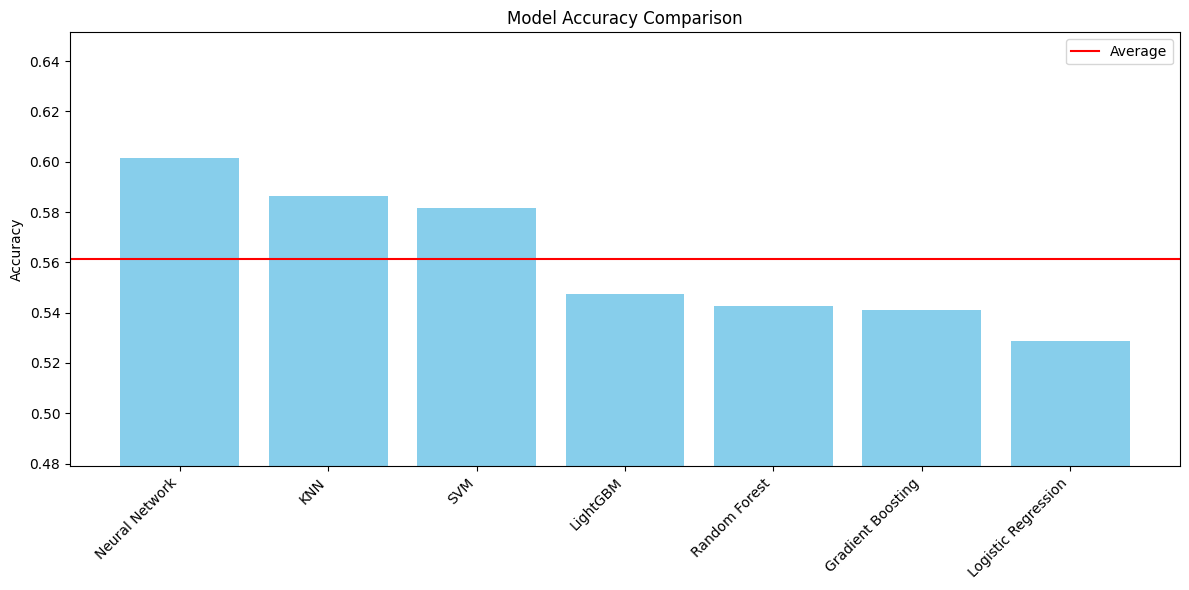

In [100]:
# Compare model performances
accuracies = {name: results['accuracy'] for name, results in model_results.items()}
best_model_name = max(accuracies, key=accuracies.get)

print(f"\n==== Model Comparison ====")
for model_name, accuracy in sorted(accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name}: {accuracy:.4f}")
    
print(f"\nBest model: {best_model_name} with accuracy {accuracies[best_model_name]:.4f}")

# Visualize model comparison
plt.figure(figsize=(12, 6))
model_names = list(accuracies.keys())
model_accs = list(accuracies.values())

# Sort by accuracy
sorted_indices = np.argsort(model_accs)[::-1]
model_names = [model_names[i] for i in sorted_indices]
model_accs = [model_accs[i] for i in sorted_indices]

plt.bar(model_names, model_accs, color='skyblue')
plt.axhline(y=np.mean(model_accs), color='r', linestyle='-', label='Average')
plt.xticks(rotation=45, ha='right')
plt.ylim(min(model_accs) - 0.05, max(model_accs) + 0.05)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend()
plt.show()

In [123]:
data.shape

(1257, 8)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model type
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'kernel': ['rbf', 'linear']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Get parameter grid for best model
for best_model_name in param_grids:
    print(f"\n==== Hyperparameter Tuning for {best_model_name} ====")
    
    
    # Perform grid search
    grid_search = GridSearchCV(
        models[best_model_name],
        param_grids[best_model_name],
        cv=tscv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_scaled, y)
    
    # Print results
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    
    # Train final model with best parameters
    final_model = grid_search.best_estimator_
    final_model.fit(X_train, y_train)
    
    print("\nFinal model performance:")
    # Evaluate on the entire dataset (just for reference)
    y_pred_final = final_model.predict(X_test)
    print(classification_report(y_test, y_pred_final))

SyntaxError: invalid syntax (2269790204.py, line 28)

In [63]:
X_test

array([[ 1.31775916,  1.29220186,  1.29784499,  1.27199121, -0.94998662],
       [ 1.31298277,  1.29974431,  1.31806093,  1.2990396 , -0.92313727],
       [ 1.29193742,  1.30699114,  1.32137999,  1.31816776, -0.99619854],
       ...,
       [ 2.21480605,  2.20632733,  2.21435371,  2.18640732, -0.94879933],
       [ 2.21391031,  2.22318711,  2.22174621,  2.23228516, -0.99730237],
       [ 2.11420538,  2.14894485,  2.13454589,  2.17744113, -1.04970838]])

In [64]:
y_pred_final = final_model.predict(X_test)
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       198
           1       0.53      1.00      0.69       224

    accuracy                           0.53       422
   macro avg       0.27      0.50      0.35       422
weighted avg       0.28      0.53      0.37       422



/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sacsresta/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [72]:
X_train.shape

(2114, 5)